(605, 1100, 3)


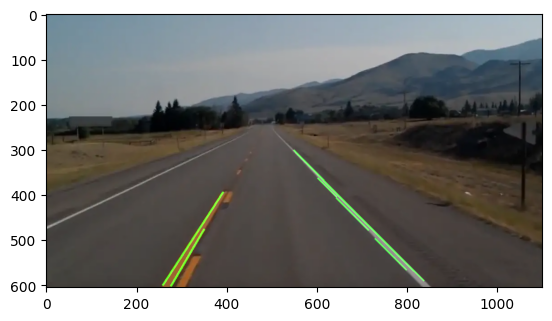

In [8]:
# Road Lane Line Detection with OpenCV

import matplotlib.pylab as plt
import numpy as np
import cv2

def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    # channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_lines(img,lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    img = cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img


image = cv2.imread('road.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [(0,height),(width/2,height/2),(width,height)]

gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

canny_image = cv2.Canny(gray_image,100,200)

cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices],np.int32))

lines = cv2.HoughLinesP(cropped_image,rho=6,theta=np.pi/60,threshold=160,lines=np.array([]),minLineLength=40,maxLineGap=25)

image_with_lines = draw_lines(image,lines)

plt.imshow(image_with_lines)
plt.show()


In [4]:
# For video

import matplotlib.pylab as plt
import numpy as np
import cv2

def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    # channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_lines(img,lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    img = cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img


# image = cv2.imread('road.jpg')
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertices = [(0,height),(width/2,height/2),(width,height)]

    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    canny_image = cv2.Canny(gray_image,100,120)

    cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices],np.int32))

    lines = cv2.HoughLinesP(cropped_image,rho=2,theta=np.pi/180,threshold=50,lines=np.array([]),minLineLength=40,maxLineGap=100)

    image_with_lines = draw_lines(image,lines)

    return image_with_lines

cap = cv2.VideoCapture('lanetest.mp4')

while(cap.isOpened()):
    ret , frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()




(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
(360, 640, 3)
